<a href="https://colab.research.google.com/github/RizaRafeek/Telecom-Churn-Prediction/blob/main/Churn_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- PASTE YOUR KAGGLE CREDENTIALS HERE ---
os.environ['KAGGLE_USERNAME'] = "enter your kaggle username url"
os.environ['KAGGLE_KEY'] = "Enter your api key"

# Download the data
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 352MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [2]:
# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Drop the ID (The AI doesn't need to know their name/ID)
df.drop('customerID', axis=1, inplace=True)

# 2. Fix 'TotalCharges' (The blank spaces in this column are a classic trap!)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# 3. Convert categories to numbers (One-Hot Encoding)
# This turns "Contract: Monthly" into a column of 1s and 0s
df_final = pd.get_dummies(df, drop_first=True)

/tmp/ipython-input-1235742971.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [3]:
# Define Features (X) and Target (y)
X = df_final.drop('Churn_Yes', axis=1)
y = df_final['Churn_Yes']

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALE THE DATA (Crucial for Deep Learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Setup Complete! Data is cleaned, split, and scaled.")

Setup Complete! Data is cleaned, split, and scaled.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Initialize the model
model = Sequential()

# 2. Input Layer & First Hidden Layer
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# 3. Second Hidden Layer
model.add(Dense(8, activation='relu'))

# 4. Output Layer
model.add(Dense(1, activation='sigmoid'))

# 5. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 1. Start the training
# We store the results in 'history' so we can graph the learning curve later
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7038 - loss: 0.5580 - val_accuracy: 0.7853 - val_loss: 0.4545
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7836 - loss: 0.4603 - val_accuracy: 0.7933 - val_loss: 0.4345
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7847 - loss: 0.4455 - val_accuracy: 0.7933 - val_loss: 0.4258
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.4353 - val_accuracy: 0.7959 - val_loss: 0.4229
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8055 - loss: 0.4201 - val_accuracy: 0.7941 - val_loss: 0.4197
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4258 - val_accuracy: 0.7995 - val_loss: 0.4179
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.4234 - val_accuracy: 0.7986 - val_loss: 0.4177
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8059 - loss: 0.4159 - val_accuracy: 0.

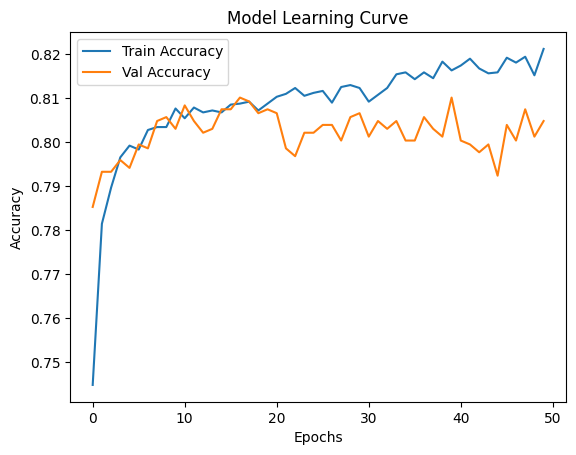

In [6]:
import matplotlib.pyplot as plt

# 1. Plot Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1036
        True       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



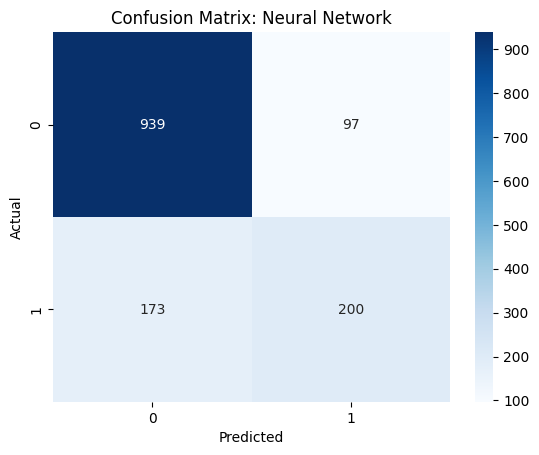

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Predict the probability for the test set
y_pred_probs = model.predict(X_test_scaled)

# 2. Convert probability to 0 or 1 (Threshold of 0.5)
y_pred_nn = (y_pred_probs > 0.5).astype(int)

# 3. Print the results
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# 4. Plot a Heatmap of the results
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Neural Network')
plt.show()

In [9]:
from sklearn.metrics import classification_report

# 1. Get predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred_nn = (y_pred_probs > 0.5).astype(int)

# 2. Print the report
print(classification_report(y_test, y_pred_nn))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1036
        True       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [10]:
# 1. Define weights: Make 'True' (1) three times more important than 'False' (0)
class_weights = {0: 1, 1: 3}

# 2. Re-train the same model structure with these weights
history_weighted = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8013 - loss: 0.6932 - val_accuracy: 0.7507 - val_loss: 0.4841
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7770 - loss: 0.6773 - val_accuracy: 0.7720 - val_loss: 0.4536
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7713 - loss: 0.6849 - val_accuracy: 0.7533 - val_loss: 0.4803
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7761 - loss: 0.6655 - val_accuracy: 0.7587 - val_loss: 0.4796
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.6703 - val_accuracy: 0.7453 - val_loss: 0.4873
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.6627 - val_accuracy: 0.7587 - val_loss: 0.4771
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.6577 - val_accuracy: 0.7516 - val_loss: 0.4720
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7883 - loss: 0.6731 - val_accuracy: 0.

In [11]:
# 1. Get new predictions
y_pred_probs_weighted = model.predict(X_test_scaled)
y_pred_weighted = (y_pred_probs_weighted > 0.5).astype(int)

# 2. Print the new report
print("Weighted Neural Network Results:")
print(classification_report(y_test, y_pred_weighted))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Weighted Neural Network Results:
              precision    recall  f1-score   support

       False       0.89      0.77      0.82      1036
        True       0.53      0.73      0.61       373

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

